In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.orm import Session
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import *
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Use SQLAlchemy `create_engine` to connect to your sqlite database.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
inspector = inspect(engine)

In [8]:
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
#engine.execute('SELECT date,prcp FROM Measurement LIMIT 5').fetchall()
#engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()
engine.execute('SELECT * FROM Station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [17]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date.asc()).first()

('2010-01-01')

In [18]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find all date after 2016-08-23
result = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
type(result)
#result

list

In [20]:
#result

In [21]:
#save the query to a pandas data frame
df=pd.DataFrame(result)
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [22]:
#make the date column the index
new_df = df.set_index('date')

In [23]:
#sort the data frame by date
new_df.sort_index()
new_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


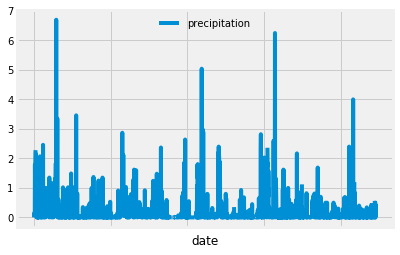

In [24]:
#plot the query results
prcp_plot = df.plot(kind='line',x='date',y='prcp',label='precipitation')
prcp_plot.legend(loc='upper center', frameon=False)
plt.show()

In [25]:
df.describe()
#df.count()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print("Query Date: ", query_date)
type(query_date)

Query Date:  2016-08-22


datetime.date

In [27]:
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date == query_date).all()

[('2016-08-22', 0.4),
 ('2016-08-22', 0.94),
 ('2016-08-22', None),
 ('2016-08-22', None),
 ('2016-08-22', 0.4),
 ('2016-08-22', 2.32),
 ('2016-08-22', 1.2)]

In [28]:
# Design a query to show how many stations are available in this dataset?
# Total stations
session.query(func.count(Station.id)).all()

[(9)]

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()
active = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        all()

active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
most_active = session.query(Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        first()
most_active
type(most_active)
print("Station with highest number of observations: ",most_active)

Station with highest number of observations:  ('USC00519281',)


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [32]:
max_tobs = session.query(Measurement.station,func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).all()

In [33]:
min_tobs = session.query(Measurement.station,func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).all()

In [34]:
avg_tobs = session.query(Measurement.station,func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).all()
avg_tobs

[('USC00519281', 71.66378066378067)]

In [35]:
print("Maximum Temp: ",max_tobs)
print("Minimum Temp: ",min_tobs)
print("Average Temp: ",avg_tobs)

Maximum Temp:  [('USC00519281', 85.0)]
Minimum Temp:  [('USC00519281', 54.0)]
Average Temp:  [('USC00519281', 71.66378066378067)]


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_result = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
#temp_result

In [37]:
#save the query to a pandas data frame
temp_result_df=pd.DataFrame(temp_result)
temp_result_df.describe()

,tobs
count,2230.000000
mean,74.590583
std,4.611667
min,58.000000
25%,72.000000
50%,75.000000
75%,78.000000
max,87.000000


In [38]:
#make the date column the index
index_df = temp_result_df.set_index('date')
#index_df

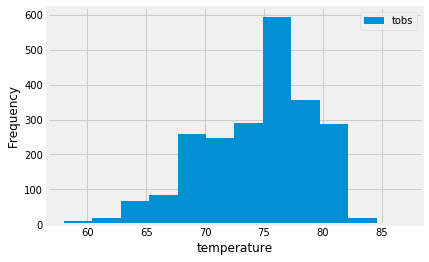

In [39]:
#plot the query results
index_df.plot.hist(bins=12)
plt.xlabel('temperature')
plt.show()

In [40]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))
type(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


list

In [41]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date=dt.date(2017,1,1)
end_date=dt.date(2017,1,15)
print(calc_temps(start_date, end_date))
tmin,tavg,tmax=calc_temps(start_date, end_date)[0]

[(60.0, 68.5505617977528, 81.0)]


/anaconda3/envs/wk4data/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


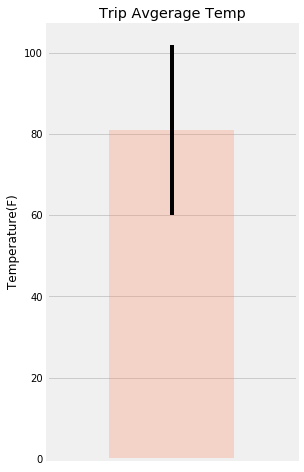

In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
yerr= tmax -tmin
xpos=0


myplot=ax.bar(xpos,tmax, yerr=yerr, color='coral', alpha=.25, align="center")
ax.set(xticks=range(xpos),xticklabels='x', title="Trip Avgerage Temp",ylabel='Temperature(F)')
ax.margins(.5,.05)

fig.show()

In [49]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
yearago=dt.timedelta(days=365)
lastyearstart=start_date-yearago
lastyearend=end_date-yearago

#Rainfall per weather station for trip dates minus one year sorted by prcp amount
rainfall = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= lastyearstart).\
    filter(Measurement.date <= lastyearend).\
    order_by(Measurement.prcp.desc()).all()

rainfall

[('USC00516128', '2016-01-06', 1.49),
 ('USC00516128', '2016-01-07', 1.32),
 ('USC00519281', '2016-01-06', 0.35),
 ('USC00519281', '2016-01-07', 0.35),
 ('USC00514830', '2016-01-12', 0.32),
 ('USC00513117', '2016-01-06', 0.3),
 ('USC00513117', '2016-01-05', 0.19),
 ('USC00519397', '2016-01-07', 0.18),
 ('USC00519281', '2016-01-05', 0.18),
 ('USC00514830', '2016-01-15', 0.15),
 ('USC00519523', '2016-01-02', 0.13),
 ('USC00516128', '2016-01-02', 0.13),
 ('USC00514830', '2016-01-05', 0.1),
 ('USC00514830', '2016-01-02', 0.05),
 ('USC00514830', '2016-01-16', 0.05),
 ('USC00519281', '2016-01-16', 0.05),
 ('USC00514830', '2016-01-06', 0.04),
 ('USC00519397', '2016-01-09', 0.03),
 ('USC00513117', '2016-01-07', 0.03),
 ('USC00513117', '2016-01-12', 0.03),
 ('USC00513117', '2016-01-16', 0.03),
 ('USC00514830', '2016-01-07', 0.03),
 ('USC00519281', '2016-01-02', 0.03),
 ('USC00519281', '2016-01-08', 0.02),
 ('USC00519281', '2016-01-09', 0.02),
 ('USC00519281', '2016-01-10', 0.02),
 ('USC00519281

In [44]:
#for m,s session.query(Measyurement,Station).\
#    filter(Measurement.station)

## Optional Challenge Assignment

In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [46]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [47]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [48]:
# Plot the daily normals as an area plot with `stacked=False`
